# Segmenting and Clustering Neighborhoods in Toronto

In this assignment, we will be required to explore, segment, and cluster the neighborhoods in the city of Toronto. However, unlike New York, the neighborhood data is not readily available on the internet. 

For the Toronto neighborhood data, a [Wikipedia](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. 

For Data scraping, I'll be using the **Beautiful Soup** library.



## 1. Scraping a [Wikipedia](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) page and transform the data into a pandas dataframe

### Import necessary Libraries

In [2]:
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes 

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
from bs4 import BeautifulSoup #Library for web scraping
import requests as req #library to handle requests
import pandas as pd #library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# tranforming json file into a pandas dataframe library
#from pandas.io.json import json_normalize
from pandas import json_normalize    
import numpy as np # library to handle data in a vectorized manner
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import seaborn as sns


import folium # map rendering library

Since on the page we are only interested in the table with information about Toronto districts, we need to know the HTML tag from which the table begins - this is the <code>tbody</code> tag.

All child tags can be displayed using the <code>children</code> attribute. <code>root_childs</code> is a list of all child tags for <code>tbody</code>

In [4]:
resp = req.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
  
soup = BeautifulSoup(resp.text, 'lxml')
 
root = soup.tbody
    
root_childs = [e for e in root.children if e.name is not None]
print("Print text parameter of the first element of root_childs: " + root_childs[0].text)
print("Print name parameter of the first element of root_childs: " + root_childs[0].name)
print("And this is how the root_childs first element looks like: ")
print(root_childs[0])


Print text parameter of the first element of root_childs: 
Postal Code

Borough

Neighbourhood

Print name parameter of the first element of root_childs: tr
And this is how the root_childs first element looks like: 
<tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighbourhood
</th></tr>


The first element of <code>root_childs</code> are the headers for our table.  
Let's create a Dataframe with headers:

In [5]:
Toronto_data = pd.DataFrame(columns = list(root_childs[0].text.strip('\n').split('\n\n')))
Toronto_data



,Postal Code,Borough,Neighbourhood


Similarly, using the <code>сhildren</code> attribute, we extract cells with data from the web table and add them to the corresponding row of the dataframe <code>Toronto_data</code>

In [6]:
i = 0
for tr_child in root_childs[1:]:
    tr_child = [r for r in tr_child.children if r.name is not None]
    Toronto_data.loc[i] = list([tr_child[0].text.rstrip('\n'), tr_child[1].text.rstrip('\n'), tr_child[2].text.rstrip('\n')])
    i = i + 1
    

In [7]:
Toronto_data.head(10)


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


Let's see how many rows in our dataframe with the "Not assigned" value in the "Neighbourhood" column

In [8]:
Toronto_data_Neighbour_Not_assigned = Toronto_data[Toronto_data['Neighbourhood'] == 'Not assigned']
Toronto_data_Neighbour_Not_assigned

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
7,M8A,Not assigned,Not assigned
10,M2B,Not assigned,Not assigned
15,M7B,Not assigned,Not assigned
16,M8B,Not assigned,Not assigned
19,M2C,Not assigned,Not assigned
24,M7C,Not assigned,Not assigned
25,M8C,Not assigned,Not assigned
28,M2E,Not assigned,Not assigned


In the "Borough" column for the corresponding lines, the value is also "Not assigned"

In [9]:
Toronto_data_Neighbour_Not_assigned['Borough'].unique()

array(['Not assigned'], dtype=object)

77 lines out of 180. That's quite a lot ...  
But we should exclude these lines from our dataframe.

In [10]:
Toronto_data_clear = Toronto_data[Toronto_data['Neighbourhood'] != 'Not assigned']

In [11]:
Toronto_data_clear

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


Reset index with parameters <code>drop = True, inplace = True</code>

In [12]:
Toronto_data_clear.reset_index(drop = True, inplace=True)
Toronto_data_clear

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


Let's see how many rows are in the final dataframe

In [13]:
Toronto_data_clear.shape[0]

103

## 2. Geocoding - Add coordinates to the dataframe

I'll use [here.com](https://developer.here.com/documentation/geocoding-search-api/dev_guide/topics/quick-start.html) to extract the coordinates for the neighbourhoods of Toronto. This service provides API for working with geodata. You need to register a developer account, a free plan is available without entering a credit card. Let's Go!

I created a developer account, then create a new project and go to the "REST". Here you will see a button "Create API key". Click this button and save the API KEY, it will take us to a GET request.

Try to send the request and get data about any neighbourhood by postal code.

In [14]:
# @hidden_cell
district = 'Victoria Village'.replace(" ", '%20')
API_KEY = 'oHJmr6hh-7dWsbCFaKwJzrukFjQDR6iUyMtyiQHbYOQ'
COUNTRY = 'can'
CITY = 'Toronto'
POSTAL = 'M5A'

In [15]:
#url = 'https://geocoder.ls.hereapi.com/6.2/geocode.json?apiKey={}&city={}&country={}&District={}'.format(API_KEY, CITY, COUNTRY, district)
#url

In [16]:
url = 'https://geocoder.ls.hereapi.com/6.2/geocode.json?apiKey={}&city={}&country={}&postalCode={}'.format(API_KEY, CITY, COUNTRY, POSTAL)
url

'https://geocoder.ls.hereapi.com/6.2/geocode.json?apiKey=oHJmr6hh-7dWsbCFaKwJzrukFjQDR6iUyMtyiQHbYOQ&city=Toronto&country=can&postalCode=M5A'

In [17]:
results = req.get(url).json()
results

{'Response': {'MetaInfo': {'Timestamp': '2020-12-28T10:30:59.563+0000'},
  'View': [{'_type': 'SearchResultsViewType',
    'ViewId': 0,
    'Result': [{'Relevance': 1.0,
      'MatchLevel': 'postalCode',
      'MatchQuality': {'Country': 1.0, 'City': 1.0, 'PostalCode': 1.0},
      'Location': {'LocationId': 'NT_PkseEemrphS1e7pEp4OOID',
       'LocationType': 'point',
       'DisplayPosition': {'Latitude': 43.65512, 'Longitude': -79.36264},
       'NavigationPosition': [{'Latitude': 43.65512, 'Longitude': -79.36264}],
       'MapView': {'TopLeft': {'Latitude': 43.66763, 'Longitude': -79.37691},
        'BottomRight': {'Latitude': 43.63296, 'Longitude': -79.32863}},
       'Address': {'Label': 'M5A, Toronto, ON, Canada',
        'Country': 'CAN',
        'State': 'ON',
        'County': 'Toronto',
        'City': 'Toronto',
        'PostalCode': 'M5A',
        'AdditionalData': [{'value': 'Canada', 'key': 'CountryName'},
         {'value': 'Ontario', 'key': 'StateName'},
         {'value

The name of the Toronto neighbourhoods corresponds to the field "District" from the response in json.  
Now try to extract latitude and longitude from the response:

In [18]:
PC_Latitude = results['Response']['View'][0]['Result'][0]['Location']['DisplayPosition']['Latitude']
PC_Longitude = results['Response']['View'][0]['Result'][0]['Location']['DisplayPosition']['Longitude']
print(PC_Latitude, PC_Longitude)


43.65512 -79.36264


 Define a method <code>getLatiLngByPostalCode</code> which will return the longitude and latitude by postal code.  
<code>getLatiLngByPostalCode</code>  returns <code>NaN</code> if the postal code is not found in the response.

In [19]:
def getLatiLngByPostalCode (postalCode):
    try:
        url = 'https://geocoder.ls.hereapi.com/6.2/geocode.json?apiKey={}&city={}&country={}&postalCode={}'.format(API_KEY, CITY, COUNTRY, postalCode)
        results = req.get(url).json()
        PC_Latitude = results['Response']['View'][0]['Result'][0]['Location']['DisplayPosition']['Latitude']
        PC_Longitude = results['Response']['View'][0]['Result'][0]['Location']['DisplayPosition']['Longitude']
        
    except:
        PC_Latitude = 'NaN'
        PC_Longitude = 'NaN'
        
    
        
    return (PC_Latitude, PC_Longitude)

    

In [20]:
getLatiLngByPostalCode(Toronto_data_clear.loc[75, 'Postal Code'])

(43.64777, -79.44989)

Add to <code>Toronto_data_clear</code>  two empty columns <code>Longitude</code> and <code>Latitude</code>

In [21]:
Toronto_data_clear = Toronto_data_clear.reindex( columns = Toronto_data_clear.columns.tolist() + ['Latitude','Longitude']) 
Toronto_data_clear.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,NaN,NaN
1,M4A,North York,Victoria Village,NaN,NaN
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",NaN,NaN
3,M6A,North York,"Lawrence Manor, Lawrence Heights",NaN,NaN
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",NaN,NaN


Now read from dataframe postal codes row by row and pass to <code>getLatiLngByPostalCode</code>  method. And  <code>getLatiLngByPostalCode</code>  returns the coordinates.  
Fill in the columns <code>Longitude</code> and <code>Latitude</code> in dataframe <code>Toronto_data_clear</code> coordinates

In [22]:
for row in range(0, Toronto_data_clear.shape[0]):
    
    LatiLng = getLatiLngByPostalCode(Toronto_data_clear.loc[row, 'Postal Code'])
    print(LatiLng, row)
    Toronto_data_clear.loc[row, 'Latitude'] = LatiLng[0]
    Toronto_data_clear.loc[row, 'Longitude'] = LatiLng[1]

(43.75245, -79.32991) 0
(43.73057, -79.31306) 1
(43.65512, -79.36264) 2
(43.72327, -79.45042) 3
(43.66253, -79.39188) 4
(43.66263, -79.52831) 5
(43.81139, -79.19662) 6
(43.74923, -79.36186) 7
(43.70718, -79.31192) 8
(43.65739, -79.37804) 9
(43.70687, -79.44812) 10
(43.65034, -79.55362) 11
(43.78574, -79.15875) 12
(43.72168, -79.34352) 13
(43.6897, -79.30682) 14
(43.65215, -79.37587) 15
(43.69211, -79.43036) 16
(43.64857, -79.57825) 17
(43.76575, -79.1747) 18
(43.67709, -79.29547) 19
(43.64536, -79.37306) 20
(43.68784, -79.45046) 21
(43.76812, -79.21761) 22
(43.70902, -79.36349) 23
(43.65609, -79.38493) 24
(43.66869, -79.42071) 25
(43.76944, -79.23892) 26
(43.80225, -79.35558) 27
(43.75788, -79.44847) 28
(43.70142, -79.34905) 29
(43.6497, -79.38258) 30
(43.66505, -79.43891) 31
(43.74446, -79.23117) 32
(43.78097, -79.34781) 33
(43.76476, -79.48798) 34
(43.68811, -79.33418) 35
(43.64285, -79.38076) 36
(43.64848, -79.41774) 37
(43.72582, -79.26461) 38
(43.78112, -79.3806) 39
(43.73384, -79

In [23]:
Toronto_data_clear.tail(30)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
73,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.7146,-79.4067
74,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.6748,-79.4045
75,M6R,West Toronto,"Parkdale, Roncesvalles",43.6478,-79.4499
76,M7R,Mississauga,Canada Post Gateway Processing Centre,NaN,NaN
77,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.6868,-79.5573
78,M1S,Scarborough,Agincourt,43.7945,-79.2671
79,M4S,Central Toronto,Davisville,43.7034,-79.3866
80,M5S,Downtown Toronto,"University of Toronto, Harbord",43.6631,-79.4018
81,M6S,West Toronto,"Runnymede, Swansea",43.6498,-79.4755
82,M1T,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",43.7849,-79.2972


We see that 3 postal codes not found and their coordinates are not defined. View more what kind of areas.
So, in dataframe remained unfilled coordinates of 'Canada Post Gateway Processing Centre', 'Stn A PO Boxes' and 'Business reply mail Processing Centre, South Central Letter Processing Plant Toronto'.   
I think we can remove these objects from dataframe because they are not associated with neighbourhoods of Toronto.

In [24]:
Toronto_data_clear.drop([76, 92, 100], inplace=True)
Toronto_data_clear.tail(30)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
70,M9P,Etobicoke,Westmount,43.6963,-79.5293
71,M1R,Scarborough,"Wexford, Maryvale",43.7507,-79.3005
72,M2R,North York,"Willowdale, Willowdale West",43.7799,-79.4468
73,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.7146,-79.4067
74,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.6748,-79.4045
75,M6R,West Toronto,"Parkdale, Roncesvalles",43.6478,-79.4499
77,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.6868,-79.5573
78,M1S,Scarborough,Agincourt,43.7945,-79.2671
79,M4S,Central Toronto,Davisville,43.7034,-79.3866
80,M5S,Downtown Toronto,"University of Toronto, Harbord",43.6631,-79.4018


And Reset index:

In [25]:
Toronto_data_clear.reset_index(drop = True, inplace=True)
Toronto_data_clear.tail(30)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
70,M9P,Etobicoke,Westmount,43.6963,-79.5293
71,M1R,Scarborough,"Wexford, Maryvale",43.7507,-79.3005
72,M2R,North York,"Willowdale, Willowdale West",43.7799,-79.4468
73,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.7146,-79.4067
74,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.6748,-79.4045
75,M6R,West Toronto,"Parkdale, Roncesvalles",43.6478,-79.4499
76,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.6868,-79.5573
77,M1S,Scarborough,Agincourt,43.7945,-79.2671
78,M4S,Central Toronto,Davisville,43.7034,-79.3866
79,M5S,Downtown Toronto,"University of Toronto, Harbord",43.6631,-79.4018


Write dataframe to a csv file

In [26]:
Toronto_data_clear.to_csv("Toronto_data.csv")

## 3. Segmenting and Clustering Neighborhoods in Toronto City

Now we have dataframe <code>Toronto_data_clear</code> with columns <code>Postal Code</code> (100 unique values), <code>Borough</code> (9 unique values), <code>Neighbourhood</code> (96 unique values), <code>Latitude</code>, <code>Longitude</code>

In [27]:
Toronto_data_clear['Borough'].nunique()

9

In [28]:
Toronto_data_clear['Postal Code'].nunique()

100

In [29]:
Toronto_data_clear['Neighbourhood'].nunique()

96

### Use geopy library to get the latitude and longitude values of Toronto.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>toronto_explorer</em>, as shown below.

In [30]:
address = 'Toronto, ON, CAN'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON, Canada are 43.660458, -79.38617355922466.


And create a map of Toronto with neighborhoods

In [31]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood, postal in zip(Toronto_data_clear['Latitude'], Toronto_data_clear['Longitude'], Toronto_data_clear['Borough'], Toronto_data_clear['Neighbourhood'], Toronto_data_clear['Postal Code']):
    label = '{}, {}, {}'.format(neighborhood, borough, postal)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='#8B0000',
        fill=True,
        fill_color='#D2691E',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Now we're starting to explore and cluster Toronto neighborhoods with the Foursquare API  
And first, let's define the credentials and version

In [32]:
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
ACCESS_TOKEN='YCZS4Q2L5YJA23XETR2PVGQ53XOJENX4MTWVCDSXVKK3M14Q'

print('Your credentails:')
print('ACCESS_TOKEN: ' + ACCESS_TOKEN)

Your credentails:
ACCESS_TOKEN: YCZS4Q2L5YJA23XETR2PVGQ53XOJENX4MTWVCDSXVKK3M14Q


Let's explore the first neighborhood in our dataframe by postal code. 

In [33]:
Toronto_data_clear.loc[0, ['Neighbourhood', 'Postal Code']]

Neighbourhood    Parkwoods
Postal Code            M3A
Name: 0, dtype: object

Get the neighborhood's latitude and longitude values.

In [34]:
neighborhood_latitude = Toronto_data_clear.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Toronto_data_clear.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_postal = Toronto_data_clear.loc[0, 'Postal Code'] # neighborhood postal code
neighborhood_name = Toronto_data_clear.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {}, {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_postal,    
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods, M3A are 43.75245, -79.32991.


Now, let's get the top 100 venues that are in Parkwoods, M3A  within a radius of 1000 meters.

In [35]:
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?oauth_token={}&ll={},{}&v={}&radius={}&limit={}'.format(ACCESS_TOKEN, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?oauth_token=YCZS4Q2L5YJA23XETR2PVGQ53XOJENX4MTWVCDSXVKK3M14Q&ll=43.75245,-79.32991&v=20180605&radius=1000&limit=100'

In [36]:
results = req.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fec7d28823a4a5812ca7c4f'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 27,
  'suggestedBounds': {'ne': {'lat': 43.761450009000015,
    'lng': -79.31747364773159},
   'sw': {'lat': 43.74344999099999, 'lng': -79.34234635226841}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b8991cbf964a520814232e3',
       'name': "Allwyn's Bakery",
       'location': {'address': '81 Underhill drive',
        'lat': 43.75984035203157,
   

let's borrow the get_category_type function from the Foursquare lab.

In [37]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [38]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(15)

,name,categories,lat,lng
0,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
1,Brookbanks Park,Park,43.751976,-79.332140
2,Tim Hortons,Café,43.760668,-79.326368
3,Bruno's valu-mart,Grocery Store,43.746143,-79.324630
4,High Street Fish & Chips,Fish & Chips Shop,43.745260,-79.324949
5,A&W,Fast Food Restaurant,43.760643,-79.326865
6,Shoppers Drug Mart,Pharmacy,43.745315,-79.325800
7,Food Basics,Supermarket,43.760549,-79.326045
8,Pizza Pizza,Pizza Place,43.760231,-79.325666
9,Variety Store,Food & Drink Shop,43.751974,-79.333114


And how many venues were returned by Foursquare?

In [39]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

27 venues were returned by Foursquare.


Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [40]:
def getNearbyVenues(postal, name, latitudes, longitudes, radius):
    
    venues_list=[]
    for postal, name, lat, lng in zip(postal, name, latitudes, longitudes):
        print(postal, name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?oauth_token={}&v={}&ll={},{}&radius={}&limit={}'.format(
            ACCESS_TOKEN, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = req.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            postal,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Neighbourhood Postal Code',             
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighbourhood and create a new dataframe called **toronto_venues**.

In [42]:
toronto_venues = getNearbyVenues(Toronto_data_clear['Postal Code'], Toronto_data_clear['Neighbourhood'], Toronto_data_clear['Latitude'], Toronto_data_clear['Longitude'], radius)

M3A Parkwoods
M4A Victoria Village
M5A Regent Park, Harbourfront
M6A Lawrence Manor, Lawrence Heights
M7A Queen's Park, Ontario Provincial Government
M9A Islington Avenue, Humber Valley Village
M1B Malvern, Rouge
M3B Don Mills
M4B Parkview Hill, Woodbine Gardens
M5B Garden District, Ryerson
M6B Glencairn
M9B West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
M1C Rouge Hill, Port Union, Highland Creek
M3C Don Mills
M4C Woodbine Heights
M5C St. James Town
M6C Humewood-Cedarvale
M9C Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
M1E Guildwood, Morningside, West Hill
M4E The Beaches
M5E Berczy Park
M6E Caledonia-Fairbanks
M1G Woburn
M4G Leaside
M5G Central Bay Street
M6G Christie
M1H Cedarbrae
M2H Hillcrest Village
M3H Bathurst Manor, Wilson Heights, Downsview North
M4H Thorncliffe Park
M5H Richmond, Adelaide, King
M6H Dufferin, Dovercourt Village
M1J Scarborough Village
M2J Fairview, Henry Farm, Oriole
M3J Northwood Park, York University
M4J East Toronto

In [43]:
toronto_venues.head(10)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Neighbourhood Postal Code,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.75245,-79.32991,M3A,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.75245,-79.32991,M3A,Brookbanks Park,43.751976,-79.332140,Park
2,Parkwoods,43.75245,-79.32991,M3A,Tim Hortons,43.760668,-79.326368,Café
3,Parkwoods,43.75245,-79.32991,M3A,Bruno's valu-mart,43.746143,-79.324630,Grocery Store
4,Parkwoods,43.75245,-79.32991,M3A,High Street Fish & Chips,43.745260,-79.324949,Fish & Chips Shop
5,Parkwoods,43.75245,-79.32991,M3A,A&W,43.760643,-79.326865,Fast Food Restaurant
6,Parkwoods,43.75245,-79.32991,M3A,Shoppers Drug Mart,43.745315,-79.325800,Pharmacy
7,Parkwoods,43.75245,-79.32991,M3A,Food Basics,43.760549,-79.326045,Supermarket
8,Parkwoods,43.75245,-79.32991,M3A,Pizza Pizza,43.760231,-79.325666,Pizza Place
9,Parkwoods,43.75245,-79.32991,M3A,Variety Store,43.751974,-79.333114,Food & Drink Shop


In [44]:
print(toronto_venues.shape)

(5295, 8)


In [45]:
toronto_venues.groupby('Neighbourhood Postal Code').count()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood Postal Code,,,,,,,
M1B,7,7,7,7,7,7,7
M1C,4,4,4,4,4,4,4
M1E,33,33,33,33,33,33,33
M1G,25,25,25,25,25,25,25
M1H,25,25,25,25,25,25,25
M1J,22,22,22,22,22,22,22
M1K,25,25,25,25,25,25,25
M1L,33,33,33,33,33,33,33
M1M,24,24,24,24,24,24,24


Let's find out how many unique categories can be curated from all the returned venues

In [46]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 357 uniques categories.


And then analyze Each Neighbourhood

In [47]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 
toronto_onehot['Neighbourhood Postal Code'] = toronto_venues['Neighbourhood Postal Code'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-2]] + [toronto_onehot.columns[-1]]  + list(toronto_onehot.columns[:-2])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(15)

,Neighbourhood,Neighbourhood Postal Code,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsagent,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pu

In [48]:
toronto_onehot.shape

(5295, 359)

Next, let's group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category

In [49]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood Postal Code').mean().reset_index()
toronto_grouped.head(10)

,Neighbourhood Postal Code,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsagent,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restau

In [50]:
toronto_grouped.shape

(100, 358)

Let's print each neighborhood along with the top 10 most common venues

In [51]:
num_top_venues = 10

for hood in toronto_grouped['Neighbourhood Postal Code']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood Postal Code'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M1B----
                        venue  freq
0                 Zoo Exhibit  0.29
1  Construction & Landscaping  0.14
2        Fast Food Restaurant  0.14
3                       Trail  0.14
4                Home Service  0.14
5                  Hobby Shop  0.14
6                   Newsagent  0.00
7             Organic Grocery  0.00
8                Optical Shop  0.00
9                 Opera House  0.00


----M1C----
                venue  freq
0        Burger Joint  0.25
1      Breakfast Spot  0.25
2  Italian Restaurant  0.25
3                Park  0.25
4                 ATM  0.00
5           Newsagent  0.00
6     Organic Grocery  0.00
7        Optical Shop  0.00
8         Opera House  0.00
9              Office  0.00


----M1E----
                  venue  freq
0              Pharmacy  0.06
1         Grocery Store  0.06
2            Restaurant  0.06
3                  Park  0.06
4     Convenience Store  0.06
5  Fast Food Restaurant  0.03
6           Supermarket  0.03
7     Food & Dri

Let's put that into a pandas dataframe  
First, let's write a function to sort the venues in descending order.

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood Postal Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood Postal Code'] = toronto_grouped['Neighbourhood Postal Code']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighbourhood Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Zoo Exhibit,Construction & Landscaping,Home Service,Hobby Shop,Trail,Fast Food Restaurant,Field,Escape Room,Ethiopian Restaurant,Event Service
1,M1C,Breakfast Spot,Burger Joint,Italian Restaurant,Park,Zoo Exhibit,Filipino Restaurant,Event Service,Event Space,Falafel Restaurant,Farm
2,M1E,Pharmacy,Convenience Store,Park,Restaurant,Grocery Store,Business Service,Supermarket,Sports Bar,Medical Supply Store,Bus Line
3,M1G,Indian Restaurant,Pizza Place,Fast Food Restaurant,Park,Thrift / Vintage Store,ATM,Coffee Shop,Fireworks Store,Filipino Restaurant,Supermarket
4,M1H,Indian Restaurant,Gas Station,Bakery,Caribbean Restaurant,Coffee Shop,Music Store,Shipping Store,Fried Chicken Joint,Hakka Restaurant,Supplement Shop
5,M1J,Fast Food Restaurant,Ice Cream Shop,Pharmacy,Pizza Place,Sandwich Place,Train Station,Indian Restaurant,Financial or Legal Service,Coffee Shop,Clothing Store
6,M1K,Chinese Restaurant,Discount Store,Coffee Shop,Bus Line,Grocery Store,Convenience Store,Auto Garage,Pharmacy,Department Store,Comfort Food Restaurant
7,M1L,Intersection,Ice Cream Shop,Pharmacy,Bus Line,Beer Store,Spa,Bus Station,Soccer Field,Business Service,Sandwich Place
8,M1M,Ice Cream Shop,Pharmacy,Gift Shop,Spa,Hardware Store,Sandwich Place,Bistro,Bank,Restaurant,Coffee Shop
9,M1N,Park,Ice Cream Shop,Diner,Skating Rink,Café,Farm,General Entertainment,Thai Restaurant,Gym,Auto Workshop


In [54]:
neighborhoods_venues_sorted.rename(columns={'Neighbourhood Postal Code' : 'Postal Code'}, inplace=True)
neighborhoods_venues_sorted.head()

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Zoo Exhibit,Construction & Landscaping,Home Service,Hobby Shop,Trail,Fast Food Restaurant,Field,Escape Room,Ethiopian Restaurant,Event Service
1,M1C,Breakfast Spot,Burger Joint,Italian Restaurant,Park,Zoo Exhibit,Filipino Restaurant,Event Service,Event Space,Falafel Restaurant,Farm
2,M1E,Pharmacy,Convenience Store,Park,Restaurant,Grocery Store,Business Service,Supermarket,Sports Bar,Medical Supply Store,Bus Line
3,M1G,Indian Restaurant,Pizza Place,Fast Food Restaurant,Park,Thrift / Vintage Store,ATM,Coffee Shop,Fireworks Store,Filipino Restaurant,Supermarket
4,M1H,Indian Restaurant,Gas Station,Bakery,Caribbean Restaurant,Coffee Shop,Music Store,Shipping Store,Fried Chicken Joint,Hakka Restaurant,Supplement Shop


Now, before running the clustering algorithm, I would like to determine the optimal number of clusters.  
For this I will use the Silhouette coefficient.

The Silhouette Coefficient [sklearn.metrics.silhouette_score](https://www.sklearn.org/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.  
b: The mean distance between a sample and all other points in the next nearest cluster.
The Silhouette Coefficient s for a single sample is then given as:

S = (b - a) / max(a, b)


In [55]:
toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood Postal Code', 1)
toronto_grouped_clustering.head()

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsagent,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Ca

In [56]:
coefficients = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(toronto_grouped_clustering)
    coefficients.append(metrics.silhouette_score(toronto_grouped_clustering, kmeans.labels_, metric='euclidean'))

In [57]:
coefficients

[0.7182927220408162,
 0.4237333503780206,
 0.09470007340451156,
 0.09856537988875173,
 0.10297019861373735,
 0.10244136386955756,
 0.10321985860449515,
 0.10213166734707226]

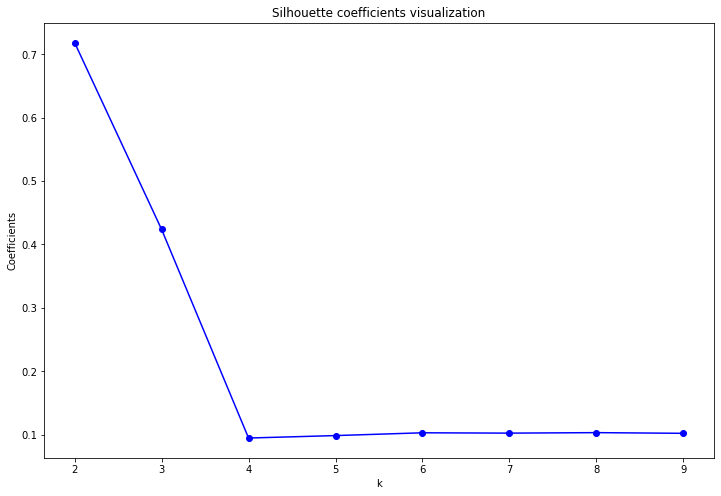

In [58]:
plt.figure(figsize=(12,8))
plt.plot(K, coefficients, 'bo-')
plt.xlabel('k')
plt.ylabel('Coefficients')
plt.title('Silhouette coefficients visualization')
plt.show()

The graph shows that we get the highest Silhouette coefficient at k = 2.

Cluster Neighborhoods
Run k-means to cluster the neighborhood into 2 clusters.

In [59]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=42).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [60]:
Toronto_data_clear.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7525,-79.3299
1,M4A,North York,Victoria Village,43.7306,-79.3131
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6551,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7233,-79.4504
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6625,-79.3919


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [61]:
# add clustering labels
neighborhoods_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)

toronto_merged = Toronto_data_clear

#merge neighborhoods_venues_sorted with Toronto_data_clear 
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Postal Code'), on='Postal Code', how='inner')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.7525,-79.3299,0,Park,Bus Stop,Convenience Store,Shop & Service,Laundry Service,Supermarket,Fish & Chips Shop,Business Service,Café,Shopping Mall
1,M4A,North York,Victoria Village,43.7306,-79.3131,0,Spa,Financial or Legal Service,Middle Eastern Restaurant,Thai Restaurant,Event Space,Thrift / Vintage Store,Outdoor Supply Store,Coffee Shop,Park,French Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6551,-79.3626,0,Coffee Shop,Café,Restaurant,Italian Restaurant,Theater,Park,Breakfast Spot,Bakery,Pub,Food Truck
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7233,-79.4504,0,Clothing Store,Coffee Shop,Restaurant,Women's Store,Sandwich Place,Fast Food Restaurant,Dessert Shop,American Restaurant,Furniture / Home Store,Juice Bar
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6625,-79.3919,0,Coffee Shop,Park,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Hotel,Café,Restaurant,Office,Boutique


In [62]:
toronto_merged['Cluster Labels'].unique()

array([0, 1])

Finally, let's visualize the resulting clusters

In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for postal, lat, lon, poi, cluster in zip(toronto_merged['Postal Code'], toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [64]:
cluster_1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
cluster_1

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.7525,-79.3299,0,Park,Bus Stop,Convenience Store,Shop & Service,Laundry Service,Supermarket,Fish & Chips Shop,Business Service,Café,Shopping Mall
1,M4A,North York,Victoria Village,43.7306,-79.3131,0,Spa,Financial or Legal Service,Middle Eastern Restaurant,Thai Restaurant,Event Space,Thrift / Vintage Store,Outdoor Supply Store,Coffee Shop,Park,French Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6551,-79.3626,0,Coffee Shop,Café,Restaurant,Italian Restaurant,Theater,Park,Breakfast Spot,Bakery,Pub,Food Truck
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7233,-79.4504,0,Clothing Store,Coffee Shop,Restaurant,Women's Store,Sandwich Place,Fast Food Restaurant,Dessert Shop,American Restaurant,Furniture / Home Store,Juice Bar
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6625,-79.3919,0,Coffee Shop,Park,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Hotel,Café,Restaurant,Office,Boutique
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.6626,-79.5283,0,Pharmacy,Grocery Store,Bank,Shopping Mall,Home Service,Skating Rink,Restaurant,Park,Liquor Store,Japanese Restaurant
6,M1B,Scarborough,"Malvern, Rouge",43.8114,-79.1966,0,Zoo Exhibit,Construction & Landscaping,Home Service,Hobby Shop,Trail,Fast Food Restaurant,Field,Escape Room,Ethiopian Restaurant,Event Service
7,M3B,North York,Don Mills,43.7492,-79.3619,0,Coffee Shop,Restaurant,Bank,Home Service,Mobile Phone Shop,Baseball Field,Gift Shop,Sushi Restaurant,Supermarket,Gas Station
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.7072,-79.3119,0,Gym / Fitness Center,Coffee Shop,Brewery,Rock Climbing Spot,Fast Food Restaurant,Athletics & Sports,Bakery,Bank,Frame Store,Café
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.6574,-79.378,0,Coffee Shop,Gastropub,Japanese Restaurant,Café,Pizza Place,Diner,Ramen Restaurant,Theater,Hotel,Restaurant


Cluster 2

In [65]:
cluster_2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]
cluster_2

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
93,M1X,Scarborough,Upper Rouge,43.8341,-79.2167,1,Bakery,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field


In [66]:
n_neighbours = toronto_merged.shape[0]
n_neighbours

100

In [67]:
print('cluster_1 includes {}% of the total number of neighbourhoods,\n'.format(round(cluster_1.shape[0] / n_neighbours * 100, 2)) 
      + 'cluster_2 includes {}% of the total number of neighbourhoods,\n'.format(round(cluster_2.shape[0] / n_neighbours * 100, 2)) 
     # + 'cluster_3 includes {}% of the total number of neighbourhoods,\n'.format(round(cluster_3.shape[0] / n_neighbours * 100, 2))
     # + 'cluster_4 includes {}% of the total number of neighbourhoods,\n'.format(round(cluster_4.shape[0] / n_neighbours * 100, 2))
    #  + 'cluster_5 includes {}% of the total number of neighbourhoods,\n'.format(round(cluster_5.shape[0] / n_neighbours * 100, 2))
    #  + 'cluster_6 includes {}% of the total number of neighbourhoods,\n'.format(round(cluster_6.shape[0] / n_neighbours * 100, 2))
    #  + 'cluster_7 includes {}% of the total number of neighbourhoods,\n'.format(round(cluster_7.shape[0] / n_neighbours * 100, 2))
     )
    

cluster_1 includes 99.0% of the total number of neighbourhoods,
cluster_2 includes 1.0% of the total number of neighbourhoods,



As a result of the algorithm's work, more than 90% of the data was assigned to cluster_1. This is a bad result.  
I think this may be due to anomalous areas with very few venues. Let's examine the data for outliers.  
let's calculate the total number of venues for each Postal Code and draw a simple plot.

In [68]:
toronto_grouped_sum = toronto_onehot.groupby('Neighbourhood Postal Code').sum().reset_index()
toronto_grouped_sum.head()


,Neighbourhood Postal Code,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsagent,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restau

In [69]:
toronto_grouped_sum['Total'] = toronto_grouped_sum.sum(axis=1)
toronto_grouped_sum.head()

,Neighbourhood Postal Code,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsagent,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restau

In [70]:
toronto_grouped_sum.sort_values('Total', ascending=False).tail()

,Neighbourhood Postal Code,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsagent,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restau

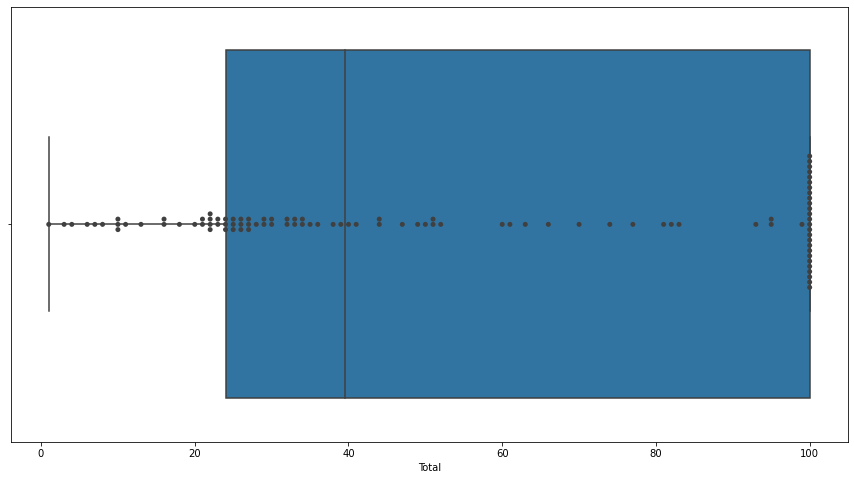

In [71]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="Total", data=toronto_grouped_sum)
ax = sns.swarmplot(x="Total", data=toronto_grouped_sum, color=".25")

On the graph, we see that a lot of points accumulate at the value 'Total' = 100, but in fact this is due to the limitation of 100 venues in our request to Foursquare and without this limitation our boxplot looked different.

<AxesSubplot:xlabel='Total', ylabel='Probability'>

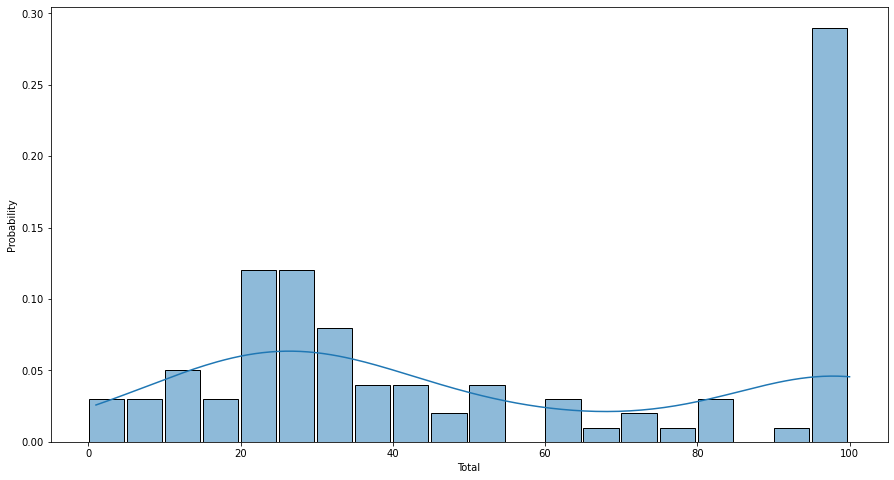

In [72]:
plt.figure(figsize=(15, 8))
sns.histplot(data=toronto_grouped_sum, x='Total', kde=True, binrange=(0, 100), bins=20, shrink=0.93, stat="probability")


I think, for clustering, it is advisable to cut off some of the districts (by Postal Code) with a small number of venues and select them into their own group. Perhaps this is a sparsely populated area on the outskirts of Toronto or for other reasons there are few venues.  
Cut lines where 'Total' is less than or equal to 10

In [73]:
limit = 10
toronto_grouped_sum_more_limit = toronto_grouped_sum[toronto_grouped_sum['Total'] > limit].sort_values('Total', ascending=False)
toronto_grouped_sum_more_limit.head(10)

,Neighbourhood Postal Code,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsagent,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restau

In [74]:
Postal_Code_there_more_limit_venues = []
Postal_Code_there_more_limit_venues = toronto_grouped_sum_more_limit['Neighbourhood Postal Code'].tolist()
Postal_Code_there_more_limit_venues[0:10]

['M5X', 'M6G', 'M5V', 'M4K', 'M4M', 'M5T', 'M4P', 'M4S', 'M5S', 'M5R']

From the toronto_grouped dataframe, select only rows that match the selection criterion and perform clustering

In [75]:
#toronto_grouped_clustering_more_limit = toronto_grouped.drop('Neighbourhood Postal Code', 1)   ????????????????
#toronto_grouped_clustering_more_limit.head()

In [76]:
toronto_grouped_train = toronto_grouped[toronto_grouped['Neighbourhood Postal Code'].isin(Postal_Code_there_more_limit_venues)].drop('Neighbourhood Postal Code', 1)
toronto_grouped_train.head(10)

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsagent,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Ca

In [81]:
toronto_grouped_train.shape

(91, 357)

Before clustering, we first determine the optimal number of clusters as before using the Silhouette coefficient

In [88]:
coefficients = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(toronto_grouped_train)
    coefficients.append(metrics.silhouette_score(toronto_grouped_train, kmeans.labels_, metric='euclidean'))

In [89]:
coefficients

[0.1186354152843681,
 0.10877837028548994,
 0.11791538511100869,
 0.0228809179848777,
 0.0235064175852051,
 0.027702368416600055,
 0.031012795191119942,
 0.021136574631890906]

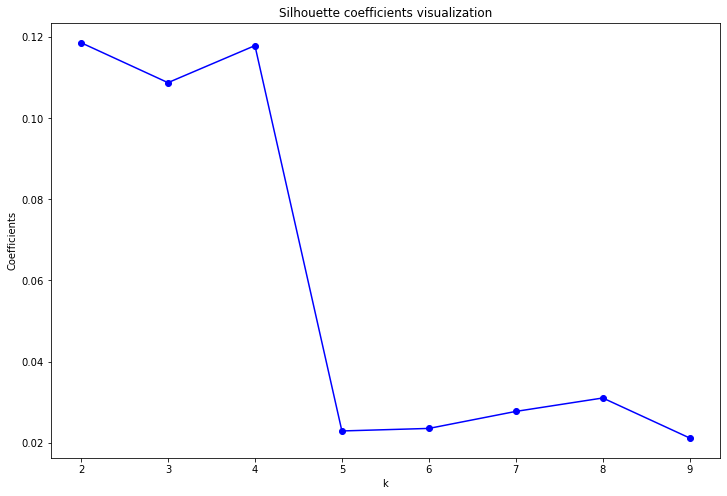

In [90]:
plt.figure(figsize=(12,8))
plt.plot(K, coefficients, 'bo-')
plt.xlabel('k')
plt.ylabel('Coefficients')
plt.title('Silhouette coefficients visualization')
plt.show()

Clustering dataframe toronto_grouped_train with <code>kclusters = 2 </code>

In [98]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=42).fit(toronto_grouped_train)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [99]:
neighborhoods_venues_sorted_more_limit = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Postal Code'].isin(Postal_Code_there_more_limit_venues)].drop('Cluster Labels', 1)
neighborhoods_venues_sorted_more_limit.head()

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M1E,Pharmacy,Convenience Store,Park,Restaurant,Grocery Store,Business Service,Supermarket,Sports Bar,Medical Supply Store,Bus Line
3,M1G,Indian Restaurant,Pizza Place,Fast Food Restaurant,Park,Thrift / Vintage Store,ATM,Coffee Shop,Fireworks Store,Filipino Restaurant,Supermarket
4,M1H,Indian Restaurant,Gas Station,Bakery,Caribbean Restaurant,Coffee Shop,Music Store,Shipping Store,Fried Chicken Joint,Hakka Restaurant,Supplement Shop
5,M1J,Fast Food Restaurant,Ice Cream Shop,Pharmacy,Pizza Place,Sandwich Place,Train Station,Indian Restaurant,Financial or Legal Service,Coffee Shop,Clothing Store
6,M1K,Chinese Restaurant,Discount Store,Coffee Shop,Bus Line,Grocery Store,Convenience Store,Auto Garage,Pharmacy,Department Store,Comfort Food Restaurant


In [100]:
Toronto_data_clear_more_limit = Toronto_data_clear[Toronto_data_clear['Postal Code'].isin(Postal_Code_there_more_limit_venues)]
Toronto_data_clear_more_limit.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7525,-79.3299
1,M4A,North York,Victoria Village,43.7306,-79.3131
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6551,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7233,-79.4504
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6625,-79.3919


In [101]:
# add clustering labels
neighborhoods_venues_sorted_more_limit.insert(1, 'Cluster Labels', kmeans.labels_)

toronto_merged = Toronto_data_clear_more_limit

#merge Toronto_data_clear_more_limit and neighborhoods_venues_sorted_more_limit
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted_more_limit.set_index('Postal Code'), on='Postal Code', how='inner')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.7525,-79.3299,1,Park,Bus Stop,Convenience Store,Shop & Service,Laundry Service,Supermarket,Fish & Chips Shop,Business Service,Café,Shopping Mall
1,M4A,North York,Victoria Village,43.7306,-79.3131,0,Spa,Financial or Legal Service,Middle Eastern Restaurant,Thai Restaurant,Event Space,Thrift / Vintage Store,Outdoor Supply Store,Coffee Shop,Park,French Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6551,-79.3626,0,Coffee Shop,Café,Restaurant,Italian Restaurant,Theater,Park,Breakfast Spot,Bakery,Pub,Food Truck
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7233,-79.4504,0,Clothing Store,Coffee Shop,Restaurant,Women's Store,Sandwich Place,Fast Food Restaurant,Dessert Shop,American Restaurant,Furniture / Home Store,Juice Bar
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6625,-79.3919,0,Coffee Shop,Park,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Hotel,Café,Restaurant,Office,Boutique


In [102]:
toronto_merged['Cluster Labels'].unique()

array([1, 0])

In [103]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for postal, lat, lon, poi, cluster in zip(toronto_merged['Postal Code'], toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Let's look at the resulting clusters

Cluster 1

In [104]:
cluster_1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
cluster_1

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M4A,North York,Victoria Village,43.7306,-79.3131,0,Spa,Financial or Legal Service,Middle Eastern Restaurant,Thai Restaurant,Event Space,Thrift / Vintage Store,Outdoor Supply Store,Coffee Shop,Park,French Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6551,-79.3626,0,Coffee Shop,Café,Restaurant,Italian Restaurant,Theater,Park,Breakfast Spot,Bakery,Pub,Food Truck
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7233,-79.4504,0,Clothing Store,Coffee Shop,Restaurant,Women's Store,Sandwich Place,Fast Food Restaurant,Dessert Shop,American Restaurant,Furniture / Home Store,Juice Bar
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6625,-79.3919,0,Coffee Shop,Park,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Hotel,Café,Restaurant,Office,Boutique
7,M3B,North York,Don Mills,43.7492,-79.3619,0,Coffee Shop,Restaurant,Bank,Home Service,Mobile Phone Shop,Baseball Field,Gift Shop,Sushi Restaurant,Supermarket,Gas Station
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.7072,-79.3119,0,Gym / Fitness Center,Coffee Shop,Brewery,Rock Climbing Spot,Fast Food Restaurant,Athletics & Sports,Bakery,Bank,Frame Store,Café
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.6574,-79.378,0,Coffee Shop,Gastropub,Japanese Restaurant,Café,Pizza Place,Diner,Ramen Restaurant,Theater,Hotel,Restaurant
13,M3C,North York,Don Mills,43.7217,-79.3435,0,Coffee Shop,Gym,Japanese Restaurant,Clothing Store,Park,Science Museum,Restaurant,Insurance Office,Beer Store,ATM
14,M4C,East York,Woodbine Heights,43.6897,-79.3068,0,Pizza Place,Coffee Shop,Ice Cream Shop,Bar,Bank,Bakery,Café,Grocery Store,Sushi Restaurant,Park
15,M5C,Downtown Toronto,St. James Town,43.6521,-79.3759,0,Restaurant,Café,Coffee Shop,Hotel,Seafood Restaurant,Gym,Gastropub,Bakery,Cosmetics Shop,Creperie


In [105]:
cluster_2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]
cluster_2

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.7525,-79.3299,1,Park,Bus Stop,Convenience Store,Shop & Service,Laundry Service,Supermarket,Fish & Chips Shop,Business Service,Café,Shopping Mall
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.6626,-79.5283,1,Pharmacy,Grocery Store,Bank,Shopping Mall,Home Service,Skating Rink,Restaurant,Park,Liquor Store,Japanese Restaurant
10,M6B,North York,Glencairn,43.7069,-79.4481,1,Grocery Store,Ice Cream Shop,Spa,Gas Station,Bakery,Latin American Restaurant,Playground,Summer Camp,Bike Shop,Italian Restaurant
11,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.6503,-79.5536,1,Park,Pizza Place,Hotel,Convenience Store,Bank,Gift Shop,Café,Gym,Restaurant,Coffee Shop
17,M9C,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",43.6486,-79.5782,1,Park,Convenience Store,Coffee Shop,Baseball Field,Electronics Store,Pizza Place,Mobile Phone Shop,Beer Store,Garden,Liquor Store
18,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7657,-79.1747,1,Pharmacy,Convenience Store,Park,Restaurant,Grocery Store,Business Service,Supermarket,Sports Bar,Medical Supply Store,Bus Line
21,M6E,York,Caledonia-Fairbanks,43.6878,-79.4505,1,Pizza Place,Spa,Coffee Shop,Pharmacy,Miscellaneous Shop,Portuguese Restaurant,Beer Store,Event Service,Rental Service,Bus Stop
22,M1G,Scarborough,Woburn,43.7681,-79.2176,1,Indian Restaurant,Pizza Place,Fast Food Restaurant,Park,Thrift / Vintage Store,ATM,Coffee Shop,Fireworks Store,Filipino Restaurant,Supermarket
26,M1H,Scarborough,Cedarbrae,43.7694,-79.2389,1,Indian Restaurant,Gas Station,Bakery,Caribbean Restaurant,Coffee Shop,Music Store,Shipping Store,Fried Chicken Joint,Hakka Restaurant,Supplement Shop
27,M2H,North York,Hillcrest Village,43.8023,-79.3556,1,Pharmacy,Chinese Restaurant,Bank,Coffee Shop,Sandwich Place,Park,Grocery Store,Café,Fast Food Restaurant,Bookstore


In [106]:
n_neighbours = toronto_merged.shape[0]
n_neighbours

91

In [107]:
print('cluster_1 includes {}% of the total number of neighbourhoods,\n'.format(round(cluster_1.shape[0] / n_neighbours * 100, 2)) 
      + 'cluster_2 includes {}% of the total number of neighbourhoods.\n'.format(round(cluster_2.shape[0] / n_neighbours * 100, 2)) 
     
     )
    

cluster_1 includes 60.44% of the total number of neighbourhoods,
cluster_2 includes 39.56% of the total number of neighbourhoods.



Remember that we still have lines cut off at the beginning. Let's assign them to Cluster 2 and add them to the visualization on the map.

In [108]:
toronto_grouped_less_limit = toronto_grouped[np.logical_not(toronto_grouped['Neighbourhood Postal Code'].isin(Postal_Code_there_more_limit_venues))]
toronto_grouped_less_limit

,Neighbourhood Postal Code,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsagent,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restau

In [109]:
neighborhoods_venues_sorted_less_limit = neighborhoods_venues_sorted[np.logical_not(neighborhoods_venues_sorted['Postal Code'].isin(Postal_Code_there_more_limit_venues))].drop('Cluster Labels', 1)
neighborhoods_venues_sorted_less_limit

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Zoo Exhibit,Construction & Landscaping,Home Service,Hobby Shop,Trail,Fast Food Restaurant,Field,Escape Room,Ethiopian Restaurant,Event Service
1,M1C,Breakfast Spot,Burger Joint,Italian Restaurant,Park,Zoo Exhibit,Filipino Restaurant,Event Service,Event Space,Falafel Restaurant,Farm
16,M1X,Bakery,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
19,M2K,Park,Japanese Restaurant,Chinese Restaurant,Gym,Trail,Café,Spa,Bank,Flower Shop,Farm
20,M2L,Intersection,Park,Gym,Gym / Fitness Center,Fast Food Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant
32,M3M,Baseball Field,Moving Target,Park,Zoo Exhibit,Field,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm
63,M5N,Pharmacy,ATM,Skating Rink,Photography Studio,Pool,Sushi Restaurant,Café,Bank,Trail,Escape Room
78,M6L,Coffee Shop,Bakery,Convenience Store,Athletics & Sports,Gas Station,Chinese Restaurant,Park,Zoo Exhibit,Fast Food Restaurant,Ethiopian Restaurant
93,M9L,Construction & Landscaping,Home Service,Furniture / Home Store,Café,Pizza Place,General Entertainment,Skating Rink,Zoo Exhibit,Ethiopian Restaurant,Event Service


In [110]:
Toronto_data_clear_less_limit = Toronto_data_clear[np.logical_not(Toronto_data_clear['Postal Code'].isin(Postal_Code_there_more_limit_venues))]
Toronto_data_clear_less_limit

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
6,M1B,Scarborough,"Malvern, Rouge",43.8114,-79.1966
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.7857,-79.1587
39,M2K,North York,Bayview Village,43.7811,-79.3806
45,M2L,North York,"York Mills, Silver Hills",43.757,-79.3806
49,M6L,North York,"North Park, Maple Leaf Park, Upwood Park",43.7138,-79.4887
50,M9L,North York,Humber Summit,43.7595,-79.5571
53,M3M,North York,Downsview,43.7322,-79.5018
62,M5N,Central Toronto,Roselawn,43.7121,-79.4185
93,M1X,Scarborough,Upper Rouge,43.8341,-79.2167


In [111]:
# add clustering labels
neighborhoods_venues_sorted_less_limit.insert(1, 'Cluster Labels', 2)



In [112]:
neighborhoods_venues_sorted_less_limit

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,2,Zoo Exhibit,Construction & Landscaping,Home Service,Hobby Shop,Trail,Fast Food Restaurant,Field,Escape Room,Ethiopian Restaurant,Event Service
1,M1C,2,Breakfast Spot,Burger Joint,Italian Restaurant,Park,Zoo Exhibit,Filipino Restaurant,Event Service,Event Space,Falafel Restaurant,Farm
16,M1X,2,Bakery,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
19,M2K,2,Park,Japanese Restaurant,Chinese Restaurant,Gym,Trail,Café,Spa,Bank,Flower Shop,Farm
20,M2L,2,Intersection,Park,Gym,Gym / Fitness Center,Fast Food Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant
32,M3M,2,Baseball Field,Moving Target,Park,Zoo Exhibit,Field,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm
63,M5N,2,Pharmacy,ATM,Skating Rink,Photography Studio,Pool,Sushi Restaurant,Café,Bank,Trail,Escape Room
78,M6L,2,Coffee Shop,Bakery,Convenience Store,Athletics & Sports,Gas Station,Chinese Restaurant,Park,Zoo Exhibit,Fast Food Restaurant,Ethiopian Restaurant
93,M9L,2,Construction & Landscaping,Home Service,Furniture / Home Store,Café,Pizza Place,General Entertainment,Skating Rink,Zoo Exhibit,Ethiopian Restaurant,Event Service


In [113]:
toronto_merged_less_limit = Toronto_data_clear_less_limit

#merge toronto_merged_less_limit with neighborhoods_venues_sorted_less_limit 
toronto_merged_less_limit = toronto_merged_less_limit.join(neighborhoods_venues_sorted_less_limit.set_index('Postal Code'), on='Postal Code', how='inner')

toronto_merged_less_limit # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,M1B,Scarborough,"Malvern, Rouge",43.8114,-79.1966,2,Zoo Exhibit,Construction & Landscaping,Home Service,Hobby Shop,Trail,Fast Food Restaurant,Field,Escape Room,Ethiopian Restaurant,Event Service
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.7857,-79.1587,2,Breakfast Spot,Burger Joint,Italian Restaurant,Park,Zoo Exhibit,Filipino Restaurant,Event Service,Event Space,Falafel Restaurant,Farm
39,M2K,North York,Bayview Village,43.7811,-79.3806,2,Park,Japanese Restaurant,Chinese Restaurant,Gym,Trail,Café,Spa,Bank,Flower Shop,Farm
45,M2L,North York,"York Mills, Silver Hills",43.757,-79.3806,2,Intersection,Park,Gym,Gym / Fitness Center,Fast Food Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant
49,M6L,North York,"North Park, Maple Leaf Park, Upwood Park",43.7138,-79.4887,2,Coffee Shop,Bakery,Convenience Store,Athletics & Sports,Gas Station,Chinese Restaurant,Park,Zoo Exhibit,Fast Food Restaurant,Ethiopian Restaurant
50,M9L,North York,Humber Summit,43.7595,-79.5571,2,Construction & Landscaping,Home Service,Furniture / Home Store,Café,Pizza Place,General Entertainment,Skating Rink,Zoo Exhibit,Ethiopian Restaurant,Event Service
53,M3M,North York,Downsview,43.7322,-79.5018,2,Baseball Field,Moving Target,Park,Zoo Exhibit,Field,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm
62,M5N,Central Toronto,Roselawn,43.7121,-79.4185,2,Pharmacy,ATM,Skating Rink,Photography Studio,Pool,Sushi Restaurant,Café,Bank,Trail,Escape Room
93,M1X,Scarborough,Upper Rouge,43.8341,-79.2167,2,Bakery,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field


In [114]:
toronto_merged_final = toronto_merged.append(toronto_merged_less_limit)
toronto_merged_final.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.7525,-79.3299,1,Park,Bus Stop,Convenience Store,Shop & Service,Laundry Service,Supermarket,Fish & Chips Shop,Business Service,Café,Shopping Mall
1,M4A,North York,Victoria Village,43.7306,-79.3131,0,Spa,Financial or Legal Service,Middle Eastern Restaurant,Thai Restaurant,Event Space,Thrift / Vintage Store,Outdoor Supply Store,Coffee Shop,Park,French Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6551,-79.3626,0,Coffee Shop,Café,Restaurant,Italian Restaurant,Theater,Park,Breakfast Spot,Bakery,Pub,Food Truck
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7233,-79.4504,0,Clothing Store,Coffee Shop,Restaurant,Women's Store,Sandwich Place,Fast Food Restaurant,Dessert Shop,American Restaurant,Furniture / Home Store,Juice Bar
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6625,-79.3919,0,Coffee Shop,Park,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Hotel,Café,Restaurant,Office,Boutique


In [115]:
toronto_merged_final.shape

(100, 16)

In [116]:
toronto_merged_final['Cluster Labels'].unique()

array([1, 0, 2], dtype=int64)

In [117]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters + 1)
ys = [i + x + (i*x)**2 for i in range(kclusters + 1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for postal, lat, lon, poi, cluster in zip(toronto_merged_final['Postal Code'], toronto_merged_final['Latitude'], toronto_merged_final['Longitude'], toronto_merged_final['Neighbourhood'], toronto_merged_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters